# Dream 11 IPL Team of the Year 2020

###  The team selection is based on the ball by ball data analysis and applying some domain knowledge. 7 Best performing Indian Players and 4 Overseas players are to be selected according to the respective playing positions.

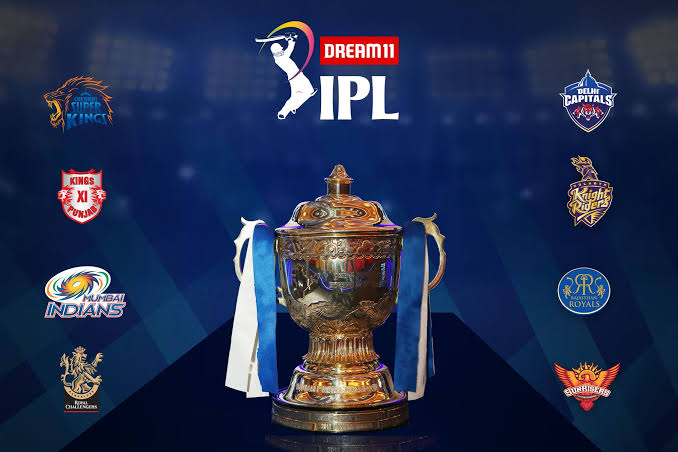

In [12]:
from IPython.display import Image
Image(filename='/home/elkanio/ipl.jpg', width=900) 

In [3]:
import pandas as pd

import plotly.figure_factory as ff
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode,iplot

In [7]:
match_details = pd.read_csv("/home/elkanio/archive (12)/Matches IPL 2020.csv")
match_details.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
55,1216495,2020,Sharjah,11-03-20,SRH,MI,SRH,field,normal,0,SRH,0,10,S Nadeem,Sharjah Cricket Stadium,Chettithody Shamshuddin,Richard Illingworth,KN Ananthapadmanabhan
56,1237177,2020,Dubai (DSC),11-05-20,DC,MI,DC,field,normal,0,MI,57,0,JJ Bumrah,Dubai International Cricket Stadium,Chris Gaffaney,Nitin Menon,KN Ananthapadmanabhan
57,1237178,2020,Abu Dhabi,11-06-20,RCB,SRH,SRH,field,normal,0,SRH,0,6,KS Williamson,"Sheikh Zayed Stadium, Abu Dhabi",Paul Reiffel,Sundaram Ravi,Virender Sharma
58,1237180,2020,Abu Dhabi,11-08-20,DC,SRH,DC,bat,normal,0,DC,17,0,MP Stoinis,"Sheikh Zayed Stadium, Abu Dhabi",Paul Reiffel,Sundaram Ravi,Chettithody Shamshuddin
59,1237181,2020,Dubai (DSC),11-10-20,DC,MI,DC,bat,normal,0,MI,0,5,TA Boult,Dubai International Cricket Stadium,Chris Gaffaney,Nitin Menon,Anil Chaudhary


### Most Man of The Match Winners 

In [8]:
Mom=match_details.groupby(['player_of_match']).player_of_match.count().sort_values(ascending=False).head(10)
Mom=Mom.to_frame().rename(columns={"player_of_match":"Times"}).reset_index()

####  Ab Devillers ,KL Rahul and Rutraj Gaikwad are the players with most Man of the Match Awards

### Visualising Man of the Match Winners 

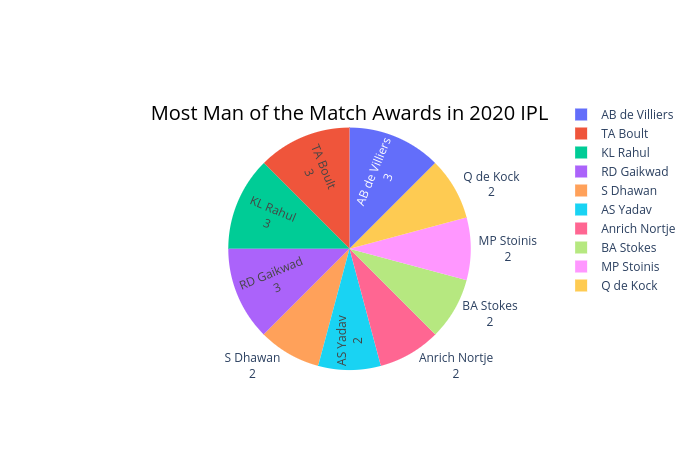

In [212]:
labels = Mom['player_of_match']
values = Mom['Times']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',
                            title='Most Man of the Match Awards in 2020 IPL',titlefont={'color':'black','size':20})])
#fig.show()

Image(filename='/home/elkanio/IPL_DataSet/Images/mom.png', width=900) 

## Analysing Player Performance using Ball by Ball Data 

In [87]:
df_score = pd.read_csv("/home/elkanio/archive (13)/IPL2020.csv")
df_score.tail()

,Match_ID,Inning,Over,Ball,Overs,Batting,Bowling,Striker,Non-Striker,Bowler,Batsman_Runs,Wides,Leg_Byes,No_Balls,Penalty_Runs,Extras,Total_Runs,Player_Out,Dismissal_Kind,Caught_By
14291,60,1,3,5,2.5,Delhi Capitals,Mumbai Indians,SS Iyer,S Dhawan,TA Boult,4,0,0,0,0,0,4,NaN,NaN,NaN
14292,60,1,3,6,2.6,Delhi Capitals,Mumbai Indians,SS Iyer,S Dhawan,TA Boult,0,0,0,0,0,0,0,NaN,NaN,NaN
14293,60,1,4,1,3.1,Delhi Capitals,Mumbai Indians,S Dhawan,SS Iyer,J Yadav,1,0,0,0,0,0,1,NaN,NaN,NaN
14294,60,1,4,2,3.2,Delhi Capitals,Mumbai Indians,SS Iyer,S Dhawan,J Yadav,1,0,0,0,0,0,1,NaN,NaN,AM Rahane
14295,60,1,4,3,3.3,Delhi Capitals,Mumbai Indians,S Dhawan,SS Iyer,J Yadav,0,0,0,0,0,0,0,S Dhawan,bowled,NaN


In [88]:
batsman_runs = df_score.groupby(['Match_ID','Striker']).agg({'Batsman_Runs':'sum'})

### Centuries

In [89]:
batsman_century = batsman_runs[batsman_runs['Batsman_Runs']>=100]
batsman_century = batsman_century.groupby('Striker').agg('count')
batsman_century=batsman_century.rename(columns={'Batsman_Runs':'Total Centuries'}).reset_index()

### Half Century 

In [84]:
batsman_hlfcentury = batsman_runs[(batsman_runs['Batsman_Runs']>=50) & (batsman_runs['Batsman_Runs']<100)]
batsman_hlfcentury=batsman_hlfcentury.groupby('Striker').agg('count')
batsman_hlfcentury=batsman_hlfcentury.rename(columns={'Batsman_Runs':'Total_Half_Centuries'})
batsman_hlfcentury=batsman_hlfcentury.sort_values('Total_Half_Centuries',ascending=False).reset_index()

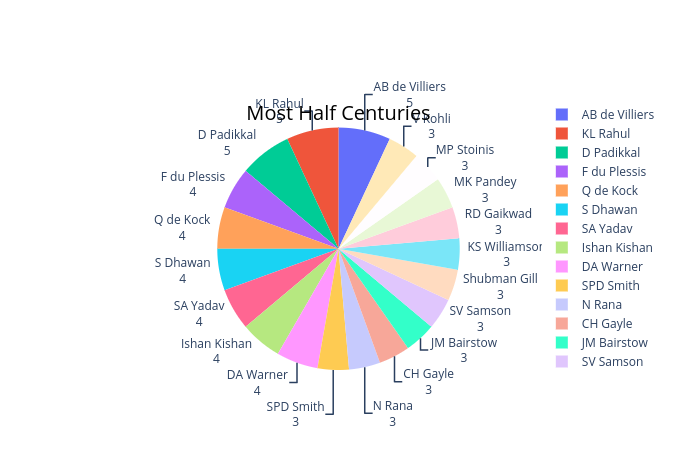

In [218]:
hlfcentury_visual=batsman_hlfcentury[batsman_hlfcentury['Total_Half_Centuries']>2]
labels = hlfcentury_visual['Striker']
values = hlfcentury_visual['Total_Half_Centuries']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',                             
                             title='Most Half Centuries',titlefont={'color':'black','size':20})])


labels = batsman_century['Striker']
values = batsman_century['Total Centuries']

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',
                            title='Most Centuries',titlefont={'color':'black','size':20})])
#fig.show()
#fig1.show()
Image(filename='/home/elkanio/IPL_DataSet/Images/cen_half.png', width=900) 


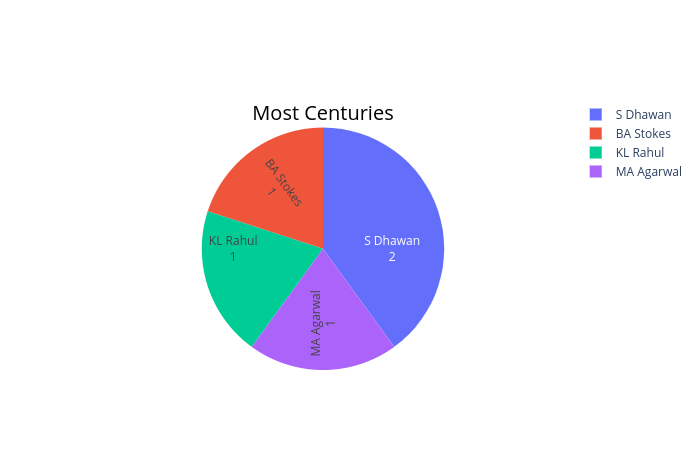

In [216]:
Image(filename='/home/elkanio/IPL_DataSet/Images/cen.png', width=900) 

#### DC Opener Shikar Dhawan is leading the Centuary table with back to back 100's.

#### Punjab skipper and Orange Cap holder KL Rahul is leading the list of most 50's table . 

### Merging 100's and 50's table  

In [91]:
tot_cen_hal = pd.merge(batsman_century,batsman_hlfcentury ,on = 'Striker',how='right' ).fillna(0)
tot_cen_hal=tot_cen_hal.rename(columns={'Total Centuries':'100''s','Total_Half_Centuries':'50''s'})
tot_cen_hal=tot_cen_hal.reset_index().rename(columns={'Striker':'Batsman'}).head(10)


In [92]:
tot_cen_hal

,index,Batsman,100s,50s
0,0,BA Stokes,1.0,1
1,1,KL Rahul,1.0,5
2,2,MA Agarwal,1.0,2
3,3,S Dhawan,2.0,4
4,4,AB de Villiers,0.0,5
5,5,D Padikkal,0.0,5
6,6,F du Plessis,0.0,4
7,7,Q de Kock,0.0,4
8,8,SA Yadav,0.0,4
9,9,Ishan Kishan,0.0,4


## Calculating Strike Rate

##### Players who have faced atleast 100 balls are considered 

In [93]:
strike_rate = df_score.groupby('Striker').agg({'Ball':'count','Batsman_Runs':'sum'})

strike_rate['Strike_Rate'] = round((strike_rate['Batsman_Runs']/strike_rate['Ball'])*100,0)
strike_rate=strike_rate.reset_index().rename(columns={'Striker':'Batsman'})
strike_rate.sort_values('Strike_Rate',ascending=False).head(10)
fig_strike_rate=strike_rate[strike_rate['Ball']>100]
fig_strike_rate.sort_values('Strike_Rate',ascending=False).head(10)


,Batsman,Ball,Batsman_Runs,Strike_Rate
47,KA Pollard,143,259,181.0
31,HH Pandya,158,278,176.0
75,N Pooran,213,353,166.0
89,RA Jadeja,142,232,163.0
115,SV Samson,242,375,155.0
1,AB de Villiers,292,454,155.0
62,MA Agarwal,283,424,150.0
107,SO Hetmyer,122,180,148.0
103,SA Yadav,320,461,144.0
99,S Dhawan,433,618,143.0


#### Kieron Pollard and Hardik Pandya from Mumbai Indians leads the Strike Rate table 

### Visualising Strike Rate and Runs Scored 

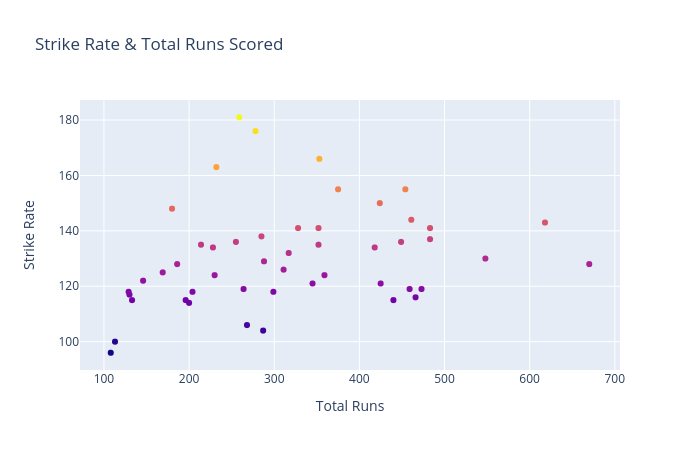

In [220]:
fig_strike_rate=strike_rate[strike_rate['Ball']>100]
fig = go.Figure(data=go.Scatter(x=fig_strike_rate['Batsman_Runs'],
                                y=fig_strike_rate['Strike_Rate'],
                                mode='markers',
                                marker_color=fig_strike_rate['Strike_Rate'],
                                text=fig_strike_rate['Batsman'])) # hover text goes here
fig.update_xaxes(title_text='Total Runs')
fig.update_yaxes(title_text='Strike Rate')
fig.update_layout(title='Strike Rate & Total Runs Scored')
#fig.show()
Image(filename='/home/elkanio/IPL_DataSet/Images/Strike Rate & Total Runs Scored.png', width=900) 


## Boundary Calculation 

In [95]:
sixes = df_score[['Striker','Batsman_Runs']][df_score.Batsman_Runs==6].groupby('Striker').agg('count')

In [96]:
fours = df_score[['Striker','Batsman_Runs']][df_score['Batsman_Runs']==4].groupby('Striker').agg('count')

In [97]:
df_boundaries  = pd.merge(sixes,fours,on='Striker')
df_boundaries=df_boundaries.rename(columns={'Striker':'Batsman','Batsman_Runs_x':'Sixes','Batsman_Runs_y':'Fours'})
df_boundaries=df_boundaries.reset_index().rename(columns={'Striker':'Batsman'})
df_boundaries.sort_values('Sixes',ascending=False).head(20)
df_boundaries.sort_values('Fours',ascending=False)


,Batsman,Sixes,Fours
54,S Dhawan,13,67
56,SA Yadav,10,60
29,KL Rahul,23,58
12,DA Warner,14,52
11,D Padikkal,8,51
...,...,...,...
10,CH Morris,3,2
33,MK Lomror,3,2
73,YBK Jaiswal,2,2
17,I Udana,1,1


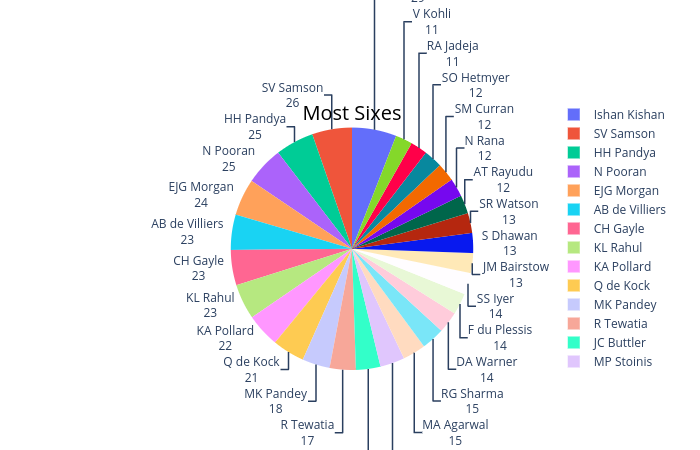

In [222]:
df_4 = df_boundaries[df_boundaries['Fours']>30]
df_6 = df_boundaries[df_boundaries['Sixes']>10]

labels = df_6['Batsman']
values = df_6['Sixes']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',                             
                             title='Most Sixes',titlefont={'color':'black','size':20})])


labels = df_4['Batsman']
values = df_4['Fours']

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',
                            title='Most Fours',titlefont={'color':'black','size':20})])
#fig.show()
#fig1.show()
Image(filename='/home/elkanio/IPL_DataSet/Images/six.png', width=900) 



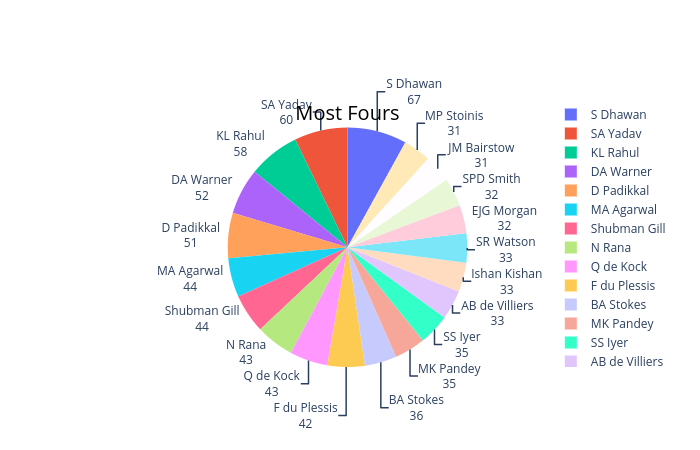

In [221]:
Image(filename='/home/elkanio/IPL_DataSet/Images/four.png', width=900) 


#### Ishan Kishan from Mumbai Indians is the leading six getter in this season IPL.  
#### Shikar Dhawan from Delhi Capitals is the leading four getter in this season IPL.

## Calculating Total Runs Scored & Average

In [114]:
batsman_runs_per_match = batsman_runs.groupby(['Striker']).agg({'sum','mean','count'})
batsman_runs_per_match=batsman_runs_per_match.rename(columns={'count':'matches','sum':'Total Runs','mean':'Average'})
batsman_runs_per_match.columns = batsman_runs_per_match.columns.droplevel()
batsman_runs_per_match = batsman_runs_per_match.reset_index().rename(columns={'Striker':'Batsman'})
batsman_runs_per_match.sort_values('Total Runs',ascending=False)

,Batsman,matches,Average,Total Runs
53,KL Rahul,14,47.857143,670
99,S Dhawan,17,36.352941,618
20,DA Warner,16,34.250000,548
85,Q de Kock,15,32.200000,483
35,Ishan Kishan,12,40.250000,483
...,...,...,...,...
112,SS Cottrell,1,0.000000,0
13,B Kumar,1,0.000000,0
12,Arshdeep Singh,1,0.000000,0
108,SP Goswami,2,0.000000,0


### Merging Bating Stats  

In [123]:
batsman = batsman_runs_per_match.merge(strike_rate, on='Batsman',how='left')
bating_stat = pd.merge(pd.merge(pd.merge(batsman_runs_per_match,strike_rate,on='Batsman',how='outer'),df_boundaries,on='Batsman',how='left'),tot_cen_hal,on='Batsman',how='left')
bating_stat.drop('index',inplace=True,axis=1)

### Assigning Points 

###### * 1 point for every run.
###### * 1 point for every 4.
###### * 2 points for every 6.
###### * 8 points for every 50.
###### *16 points for every 100.


In [125]:
bating_stat = bating_stat.fillna(0)
bating_stat = bating_stat.reset_index().rename(columns={'Batsman':'Player'})
bating_stat.drop(['Total Runs','index'],axis=1,inplace=True)
bating_stat['Points'] = bating_stat['Batsman_Runs']*1 + bating_stat['Fours']*1 + bating_stat['Sixes']*2 + bating_stat['100s']*16+bating_stat['50s']*8

bating_stat.sort_values('Batsman_Runs',ascending=False).head(10)

,Player,matches,Average,Ball,Batsman_Runs,Strike_Rate,Sixes,Fours,100s,50s,Points
53,KL Rahul,14,47.857143,525,670,128.0,23.0,58.0,1.0,5.0,830.0
99,S Dhawan,17,36.352941,433,618,143.0,13.0,67.0,2.0,4.0,775.0
20,DA Warner,16,34.250000,422,548,130.0,14.0,52.0,0.0,0.0,628.0
85,Q de Kock,15,32.200000,353,483,137.0,21.0,43.0,0.0,4.0,600.0
35,Ishan Kishan,12,40.250000,342,483,141.0,29.0,33.0,0.0,4.0,606.0
19,D Padikkal,15,31.533333,398,473,119.0,8.0,51.0,0.0,5.0,580.0
126,V Kohli,15,31.066667,400,466,116.0,11.0,23.0,0.0,0.0,511.0
103,SA Yadav,14,32.928571,320,461,144.0,10.0,60.0,0.0,4.0,573.0
113,SS Iyer,17,27.000000,385,459,119.0,14.0,35.0,0.0,0.0,522.0
1,AB de Villiers,14,32.428571,292,454,155.0,23.0,33.0,0.0,5.0,573.0


## Analysing top 5 batsmen 

In [103]:

bat_chrt = bating_stat[['Player','Batsman_Runs','Sixes','Fours','Points','Strike_Rate']]
bat_chrt['Total Runs'] =(bat_chrt['Batsman_Runs'])/(bat_chrt['Batsman_Runs'].max()/100)
bat_chrt['Sixes'] =(bat_chrt['Sixes'])/(bat_chrt['Sixes'].max()/100)
bat_chrt['Fours'] =(bat_chrt['Fours'])/(bat_chrt['Fours'].max()/100)
bat_chrt['Points'] =(bat_chrt['Points'])/(bat_chrt['Points'].max()/100)
bat_chrt['Strike_Rate'] =(bat_chrt['Strike_Rate'])/(bat_chrt['Strike_Rate'].max()/100)

In [226]:
x = bat_chrt[bat_chrt["Player"] == "Ishan Kishan"]
y = bat_chrt[bat_chrt["Player"] == "KL Rahul"]
z = bat_chrt[bat_chrt["Player"] == "DA Warner"]
a = bat_chrt[bat_chrt["Player"] == "S Dhawan"]
b = bat_chrt[bat_chrt["Player"] == "Q de Kock"]

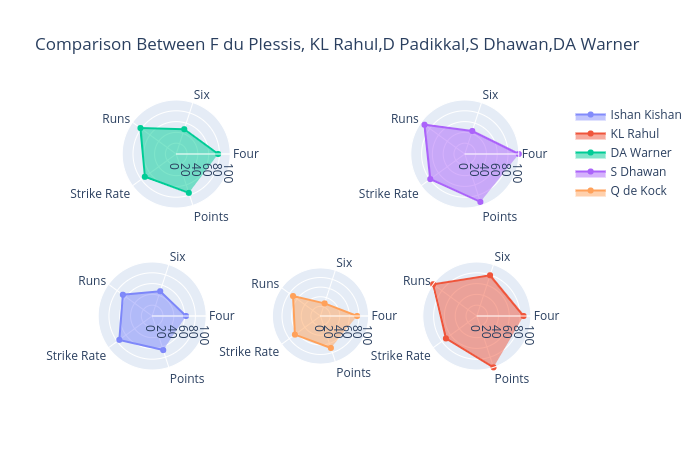

In [229]:

data = [go.Scatterpolar(
  r = [x['Fours'].values[0],x['Sixes'].values[0],x['Total Runs'].values[0],x['Strike_Rate'].values[0],x['Points'].values[0]],
  theta = ['Four','Six','Runs','Strike Rate','Points'],
  fill = 'toself', opacity = 0.8,
  name = "Ishan Kishan"),
        
    go.Scatterpolar(
  r = [y['Fours'].values[0],y['Sixes'].values[0],y['Total Runs'].values[0],y['Strike_Rate'].values[0],y['Points'].values[0]],
  theta = ['Four','Six','Runs','Strike Rate','Points'],
  fill = 'toself',subplot = "polar2",
    name = "KL Rahul"),
       
    go.Scatterpolar(
  r = [z['Fours'].values[0],z['Sixes'].values[0],z['Total Runs'].values[0],z['Strike_Rate'].values[0],z['Points'].values[0]],
  theta = ['Four','Six','Runs','Strike Rate','Points'],
  fill = 'toself',subplot = "polar3",
    name = "DA Warner"),
       
       go.Scatterpolar(
       r=[a['Fours'].values[0],a['Sixes'].values[0],a['Total Runs'].values[0],a['Strike_Rate'].values[0],a['Points'].values[0]],
  theta = ['Four','Six','Runs','Strike Rate','Points'],
  fill = 'toself', subplot = "polar4",
  name = "S Dhawan"),
        go.Scatterpolar(
        r=[b['Fours'].values[0],b['Sixes'].values[0],b['Total Runs'].values[0],b['Strike_Rate'].values[0],b['Points'].values[0]],
  theta = ['Four','Six','Runs','Strike Rate','Points'],
  fill = 'toself', subplot = "polar5",
  name = "Q de Kock")]

layout = go.Layout(title = "Comparison Between F du Plessis, KL Rahul,D Padikkal,S Dhawan,DA Warner",
                   
                   polar = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.30],y = [0, 0.40])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.65, 1],y = [0, 0.40])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.40],y = [0.60, 1])),
                  
                  polar4 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.60, 1],y = [0.60, 1])),
                  
                  polar5 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [.40, .60],y = [0, 0.40])),)

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image(filename='/home/elkanio/IPL_DataSet/Images/comp_batsman.png', width=900) 


######  KL Rahul is the player with most boundaries and runs among the top 5. Whereas Shikar Dhawan is having better Strike Rate and D Padikkal is a slow run getter.

### Dot Ball Calculation

In [130]:
dot_df = ((df_score['Extras']==0) & (df_score['Batsman_Runs']==0))
dotball_df = df_score.loc[dot_df].groupby('Striker').Ball.count()
dotball_df = dotball_df.to_frame().reset_index().rename(columns={'Striker':'Batsman'})


In [131]:
total_balls = ((df_score['Extras']==0) & (df_score['Batsman_Runs']>=0))
df_total_balls = df_score.loc[total_balls].groupby('Striker').Ball.count()
df_total_balls = df_total_balls.to_frame().reset_index().rename(columns={'Striker':'Batsman'})

In [133]:
dot_ballpercent = df_total_balls.merge(aa,on='Batsman')
dot_ballpercent=dot_ballpercent.rename(columns={'Ball_x':'Balls Faced','Ball_y':'Dot Balls'})
dot_ballpercent['Percentage']= (dot_ballpercent['Dot Balls']/dot_ballpercent['Balls Faced'])*100
dot_ballpercent = dot_ballpercent[dot_ballpercent['Balls Faced']>100]
dot_ballpercent.sort_values('Percentage',ascending=False).head(10)

,Batsman,Balls Faced,Dot Balls,Percentage
109,SR Watson,245,113,46.122449
3,AJ Finch,229,104,45.414847
91,RG Sharma,204,91,44.607843
102,SM Curran,141,59,41.843972
5,AM Rahane,103,43,41.747573
80,PJ Cummins,113,47,41.592920
40,JM Bairstow,266,110,41.353383
15,CH Gayle,205,84,40.975610
82,PP Shaw,164,67,40.853659
94,RV Uthappa,160,65,40.625000


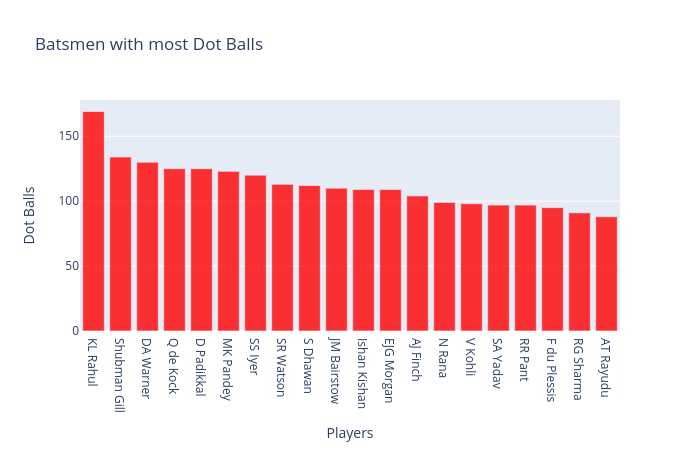

In [230]:
dot_ballpercent=dot_ballpercent.sort_values('Dot Balls',ascending=False).head(20)
trace1 = go.Bar(
    x=dot_ballpercent['Batsman'],
    y=dot_ballpercent['Dot Balls'],
    name='Dot Balls',opacity=0.8,
    marker=dict(color='red'))


data = [trace1]
layout = go.Layout(title="Batsmen with most Dot Balls",barmode='stack',xaxis = dict(tickmode='linear',title= "Players"),
                                    yaxis = dict(title= "Dot Balls"))

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image(filename='/home/elkanio/IPL_DataSet/Images/bat_dotball.png', width=900) 


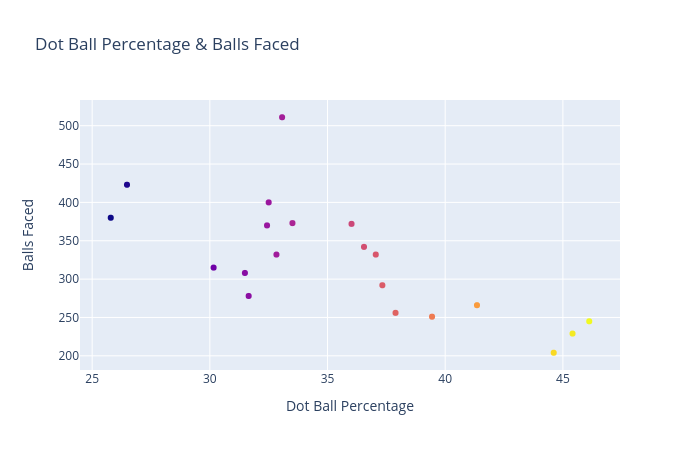

In [231]:

fig = go.Figure(data=go.Scatter(x=round(dot_ballpercent['Percentage'],2),
                                y=dot_ballpercent['Balls Faced'],
                                mode='markers',
                                marker_color=dot_ballpercent['Percentage'],
                                text=dot_ballpercent['Batsman'])) 
fig.update_xaxes(title_text='Dot Ball Percentage')
fig.update_yaxes(title_text='Balls Faced')
fig.update_layout(title='Dot Ball Percentage & Balls Faced')
#fig.show()
Image(filename='/home/elkanio/IPL_DataSet/Images/dot&balls.png', width=900) 

### Ball Per Boundary 

In [136]:
boundry_percent = ((df_score['Batsman_Runs']==4) | (df_score['Batsman_Runs']==6))
boundry_percentage = df_score.loc[boundry_percent].groupby('Striker').Ball.count()
boundry_percentage = boundry_percentage.to_frame().reset_index().rename(columns={'Striker':'Batsman'})

In [137]:
total_balls = ((df_score['Extras']==0) & (df_score['Batsman_Runs']>=0))
aa_total_balls = df_score.loc[total_balls].groupby('Striker').Ball.count()
aa_total_balls = aa_total_balls.to_frame().reset_index().rename(columns={'Striker':'Batsman'})

In [142]:
boundarypercent = aa_total_balls.merge(boundry_percentage,on='Batsman')
boundarypercent=boundarypercent.rename(columns={'Ball_x':'Total_Balls_Faced','Ball_y':'Boundary_Balls'})
boundarypercent['Balls_per_Boundary']= round((boundarypercent['Total_Balls_Faced']/boundarypercent['Boundary_Balls']),2)

boundarypercent = boundarypercent[boundarypercent['Total_Balls_Faced']>100]
boundarypercent.sort_values('Balls_per_Boundary',ascending=True)

,Batsman,Total_Balls_Faced,Boundary_Balls,Balls_per_Boundary
22,HH Pandya,149,39,3.82
36,KA Pollard,135,35,3.86
69,RA Jadeja,131,33,3.97
57,N Pooran,204,48,4.25
82,SA Yadav,308,70,4.40
47,MA Agarwal,267,59,4.53
11,BA Stokes,196,43,4.56
58,N Rana,251,55,4.56
64,PP Shaw,164,35,4.69
51,MP Stoinis,230,47,4.89


#### Hardik Pandya and Pollard will hit a boundary every 4 balls , but its more surprising to see both Virat Kohli and Maxwell down the table. 

### Boundary Percentage 

In [143]:
bound = df_boundaries.merge(batsman_runs_per_match,on='Batsman')
bound.drop(['Average','matches'],inplace=True,axis=1)
bound['Boundary_Runs'] = (bound['Sixes']*6 + bound['Fours']*4)
bound['Boundary_%'] = round((bound['Boundary_Runs']/bound['Total Runs'])*100,2)
bound = bound[bound['Total Runs']>100]
bound.sort_values('Boundary_%',ascending=False)

,Batsman,Sixes,Fours,Total Runs,Boundary_Runs,Boundary_%
1,AD Russell,9,9,117,90,76.92
16,HH Pandya,25,14,278,206,74.10
59,SP Narine,8,10,121,88,72.73
26,KA Pollard,22,13,259,184,71.04
19,JC Archer,10,5,113,80,70.80
61,SR Watson,13,33,299,210,70.23
39,N Rana,12,43,352,244,69.32
9,CH Gayle,23,15,288,198,68.75
38,N Pooran,25,23,353,242,68.56
42,PP Shaw,8,27,228,156,68.42


#### 76.92% of runs scored by Russel is from boundary followed by Hardik Pandya and Sunil Narine, once again its surprising to see Virat Kohli down the table.

### Visualising  Players and Boundary Percentage

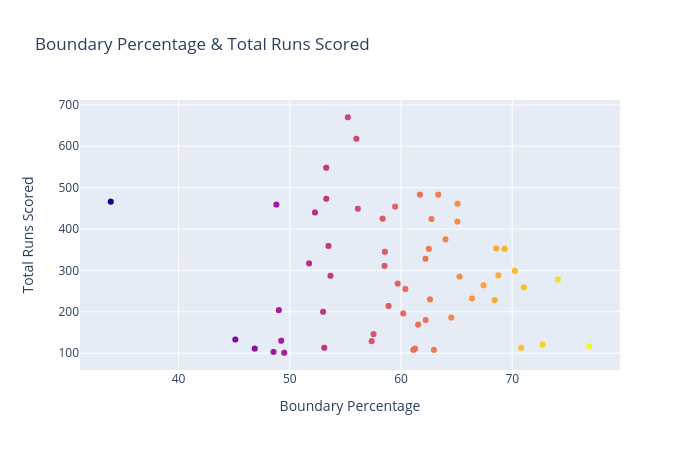

In [234]:
fig = go.Figure(data=go.Scatter(x=round(bound['Boundary_%'],2),
                                y=bound['Total Runs'],
                                mode='markers',
                                marker_color=bound['Boundary_%'],
                                text=bound['Batsman']))
fig.update_xaxes(title_text='Boundary Percentage')
fig.update_yaxes(title_text='Total Runs Scored')
fig.update_layout(title='Boundary Percentage & Total Runs Scored')
#fig.show()
Image(filename='/home/elkanio/IPL_DataSet/Images/boundary.png', width=900) 


### Visualising Top 20 Batsmen 

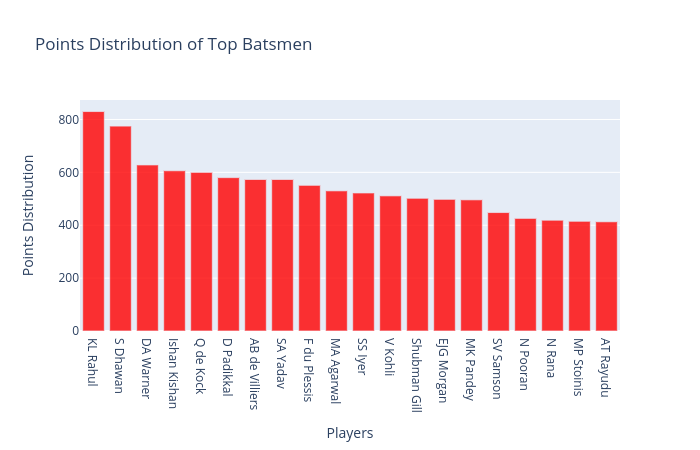

In [235]:
bating_stat_visual=bating_stat.sort_values('Points',ascending=False).head(20)
trace1 = go.Bar(
    x=bating_stat_visual['Player'],
    y=bating_stat_visual['Points'],
    name='Batting points',opacity=0.8,
    marker=dict(color='red'))


data = [trace1]
layout = go.Layout(title="Points Distribution of Top Batsmen",barmode='stack',xaxis = dict(tickmode='linear',title= "Players"),
                                    yaxis = dict(title= "Points Distribution"))

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image(filename='/home/elkanio/IPL_DataSet/Images/point_bat.png', width=900) 


# Bowling

In [236]:
df_bowl = pd.read_csv("/home/elkanio/archive (6)/Deliveries IPL 2020.csv")


###  Analysing Various Wicket Falls

In [155]:
bowler_caught =(df_bowl['Dismissal_Kind']=='caught')
bowler_bowled = (df_bowl['Dismissal_Kind']=='bowled')
bowler_lbw = (df_bowl['Dismissal_Kind']=='lbw')
bowler_caught_and_bowled = (df_bowl['Dismissal_Kind']=='caught and bowled')
bowler_stumped = (df_bowl['Dismissal_Kind']=='stumped')
bowler_hit_wicket = (df_bowl['Dismissal_Kind']=='hit wicket')


In [156]:
bowler_caught = df_bowl.loc[bowler_caught].groupby('Bowler').Dismissal_Kind.count()
bowler_bowled =  df_bowl.loc[bowler_bowled].groupby('Bowler').Dismissal_Kind.count()

bowler_lbw = df_bowl.loc[bowler_lbw].groupby('Bowler').Dismissal_Kind.count()
bowler_caught_and_bowled =  df_bowl.loc[bowler_caught_and_bowled].groupby('Bowler').Dismissal_Kind.count()

bowler_stumped = df_bowl.loc[bowler_stumped].groupby('Bowler').Dismissal_Kind.count()
bowler_hit_wicket = df_bowl.loc[bowler_hit_wicket].groupby('Bowler').Dismissal_Kind.count()

In [157]:
bowler_caught = bowler_caught.to_frame().reset_index().rename(columns={'Dismissal_Kind':'Caught Out'})

bowler_bowled = bowler_bowled.to_frame().reset_index().rename(columns={'Dismissal_Kind':'Bowled'})
bowler_lbw = bowler_lbw.to_frame().reset_index().rename(columns={'Dismissal_Kind':'LBW'})
bowler_caught_and_bowled = bowler_caught_and_bowled.to_frame().reset_index().rename(columns={'Dismissal_Kind':'Caught & Bowled'})
bowler_stumped = bowler_stumped.to_frame().reset_index().rename(columns={'Dismissal_Kind':'Stumped'})

bowler_hit_wicket = bowler_hit_wicket.to_frame().reset_index().rename(columns={'Dismissal_Kind':'Hit Wicket'})


### Merging  

In [158]:
bowler_wkt = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(bowler_caught,bowler_bowled,on = 'Bowler',how='left'),bowler_lbw,on = 'Bowler',how='left'),bowler_caught_and_bowled,on = 'Bowler',how='left'),bowler_stumped,on = 'Bowler',how='left'),bowler_hit_wicket,on = 'Bowler',how='left')
bowler_wkt=bowler_wkt.fillna(0)
bowler_wkt['Total_Wickets'] = bowler_wkt['Caught Out']+bowler_wkt['Bowled']+bowler_wkt['LBW']+bowler_wkt['Caught & Bowled']+bowler_wkt['Stumped']+bowler_wkt['Hit Wicket']
bowler_wkt = bowler_wkt.rename(columns={'Bowler':'Player'})
bowler_wkt.sort_values('Total_Wickets',ascending=False).head(10)


,Player,Caught Out,Bowled,LBW,Caught & Bowled,Stumped,Hit Wicket,Total_Wickets
33,K Rabada,24,3.0,0.0,0.0,0.0,0.0,27.0
29,JJ Bumrah,16,6.0,3.0,0.0,0.0,0.0,25.0
46,Mohammed Shami,18,2.0,1.0,0.0,0.0,0.0,21.0
76,YS Chahal,11,6.0,1.0,1.0,1.0,0.0,20.0
73,TA Boult,17,1.0,2.0,0.0,0.0,0.0,20.0
26,JC Archer,12,6.0,0.0,2.0,0.0,0.0,20.0
59,Rashid Khan,8,5.0,4.0,1.0,2.0,0.0,20.0
9,Anrich Nortje,9,8.0,1.0,0.0,0.0,0.0,18.0
16,CV Varun,10,5.0,1.0,1.0,0.0,0.0,17.0
58,RD Chahar,8,2.0,1.0,1.0,3.0,0.0,15.0


### Calculating Runs Conceeded by each Bowler 

In [160]:
bowler_runs = df_bowl.groupby(['Match_ID','Bowler','Over']).agg({'Total_Runs':'sum'}).reset_index()
over_count=df_bowl.groupby(['Match_ID', 'Bowler','Over']).agg({'Total_Runs':'sum'}).reset_index()


### Calculating Economy Rate of Each Bowler 

In [161]:
over_count = bowler_runs.groupby(['Match_ID','Bowler']).agg({'Over':'count','Total_Runs':'sum'})
over_count['eco'] = round(over_count['Total_Runs']/over_count['Over'],2)
avg_count= over_count.groupby(['Bowler']).agg({'Over':'sum','Total_Runs':'sum'})


avg_count['economy'] = round(avg_count['Total_Runs']/avg_count['Over'],1)
avg_count = avg_count[avg_count['Over']>20]

avg_count=avg_count.reset_index().rename(columns={'Bowler':'Bowler'})

avg_count.sort_values('economy',ascending=True).head(10)

,Bowler,Over,Total_Runs,economy
32,Rashid Khan,53,287.0,5.4
42,Washington Sundar,48,279.0,5.8
0,AR Patel,26,154.0,5.9
3,CH Morris,32,211.0,6.6
11,JC Archer,56,369.0,6.6
5,CV Varun,52,357.0,6.9
29,R Tewatia,46,327.0,7.1
43,YS Chahal,54,390.0,7.2
13,JJ Bumrah,54,393.0,7.3
18,L Ferguson,21,153.0,7.3


#### SunRisers main man Rashid Khan is the most economical bowler in this season IPL followed by one of the Emerging player Washington Sunder 

### Visualising Economy Rate & Total Overs Bowled for each Bowlers

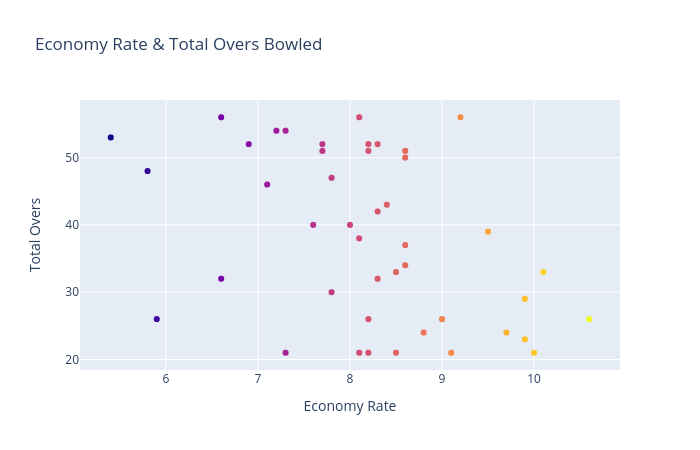

In [237]:

fig = go.Figure(data=go.Scatter(x=avg_count['economy'],
                                y=avg_count['Over'],
                                mode='markers',
                                marker_color=avg_count['economy'],
                                text=avg_count['Bowler'])) # hover text goes here
fig.update_xaxes(title_text='Economy Rate')
fig.update_yaxes(title_text='Total Overs')
fig.update_layout(title='Economy Rate & Total Overs Bowled')
#fig.show()
Image(filename='/home/elkanio/IPL_DataSet/Images/eco.png', width=900) 


### Assigning Points for Economical Bowlers 

#### * +20 points if Economy <6 
#### * +10 points if Economy between 6 & 8
#### * -5 points if Economy>8



In [167]:
over_count = bowler_runs.groupby(['Match_ID','Bowler']).agg({'Over':'count','Total_Runs':'sum'})

over_count['eco'] = round(over_count['Total_Runs']/over_count['Over'],2)
over_count['eco_range'] = over_count['eco'].apply(lambda x : 'Eco<6' if x <=6.00 else ('Eco>6&<8' if x >6.00 and x <=8.00 else 'Eco>8'))
over_count['Economy_Points'] = over_count['eco_range'].apply(lambda x : int(20) if x=='Eco<6' else( int(10) if x=='Eco>6&<8' else int(-5) )) 
over_count = over_count.groupby(['Bowler']).agg({'Economy_Points':'sum'}).reset_index()


In [168]:
over_count = over_count.groupby(['Bowler']).agg({'Economy_Points':'sum'}).reset_index()
over_count=over_count.rename(columns={'Bowler':'Player'})


### Most Dot Balls Bowled  

#### * Bowlers with Minimum 100 balls bowled 

In [170]:
df_dotball = ((df_bowl['Extras']==0) & (df_bowl['Batsman_Runs']==0))
bb = df_bowl.loc[df_dotball].groupby('Bowler').Ball.count()
bb = bb.to_frame().reset_index().rename(columns={'Bowler':'Bowler'})
total_balls = ((df_bowl['Extras']==0) & (df_bowl['Batsman_Runs']>=0))
aa_total_balls_bowler = df_bowl.loc[total_balls].groupby('Bowler').Ball.count()
aa_total_balls_bowler = aa_total_balls_bowler.to_frame().reset_index().rename(columns={'Bowler':'Bowler'})

dot_ballpercent_bowler = aa_total_balls_bowler.merge(bb,on='Bowler')
dot_ballpercent_bowler=dot_ballpercent_bowler.rename(columns={'Bowler':'Player','Ball_x':'Balls Bowled','Ball_y':'Dot Balls'})


dot_ballpercent_bowler['Dotball_Percentage']= round((dot_ballpercent_bowler['Dot Balls']/dot_ballpercent_bowler['Balls Bowled'])*100,2)
dot_ballpercent_bowler = dot_ballpercent_bowler[dot_ballpercent_bowler['Balls Bowled']>100]
dot_ballpercent_bowler.sort_values('Dotball_Percentage',ascending=False).head(20)

,Player,Balls Bowled,Dot Balls,Dotball_Percentage
33,JC Archer,330,171,51.82
19,Cottrell,119,58,48.74
77,Rashid Khan,334,160,47.90
16,CH Morris,188,90,47.87
36,JJ Bumrah,315,144,45.71
58,Mohammed Siraj,136,60,44.12
93,TA Boult,311,136,43.73
65,PJ Cummins,305,133,43.61
10,Anrich Nortje,292,125,42.81
62,N Saini,254,108,42.52


#### More than half of the deliveries bowled by Jofra Archer is a dot ball followed by Cottrell and Bumrah 

### Visualising Dot Ball Percentage and  Balls Bowled by Bowlers 

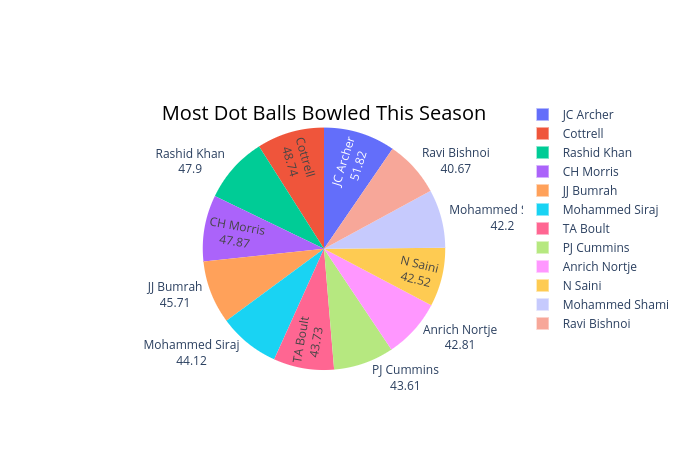

In [239]:
visual_dot_ballpercent_bowler = dot_ballpercent_bowler[dot_ballpercent_bowler['Dotball_Percentage']>40]
labels = visual_dot_ballpercent_bowler['Player']
values = visual_dot_ballpercent_bowler['Dotball_Percentage']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value',
                             insidetextorientation='radial',
                            title='Most Dot Balls Bowled This Season',titlefont={'color':'black','size':20})])
#fig.show()

Image(filename='/home/elkanio/IPL_DataSet/Images/most_dot.png', width=900) 



### Merging and Assigning Points 

In [175]:

bowler_wkt = bowler_wkt.merge(over_count, on='Player',how='outer')
bowler_wkt = bowler_wkt.merge(dot_ballpercent_bowler,on='Player',how='outer')
bowler_wkt.drop(['Balls Bowled','Dot Balls'],inplace=True,axis=1)
bowler_wkt = bowler_wkt.fillna(0)


In [177]:
bowler_wkt['Total_Points'] = ((bowler_wkt['Total_Wickets'] *25) + bowler_wkt['Economy_Points']+(round(bowler_wkt['Dotball_Percentage'],0)))
bowler_wkt.sort_values('Total_Points',ascending=False)

,Player,Caught Out,Bowled,LBW,Caught & Bowled,Stumped,Hit Wicket,Total_Wickets,Economy_Points,Dotball_Percentage,Total_Points
29,JJ Bumrah,16.0,6.0,3.0,0.0,0.0,0.0,25.0,115,45.71,786.0
33,K Rabada,24.0,3.0,0.0,0.0,0.0,0.0,27.0,70,39.26,784.0
59,Rashid Khan,8.0,5.0,4.0,1.0,2.0,0.0,20.0,210,47.90,758.0
26,JC Archer,12.0,6.0,0.0,2.0,0.0,0.0,20.0,165,51.82,717.0
76,YS Chahal,11.0,6.0,1.0,1.0,1.0,0.0,20.0,100,33.55,634.0
...,...,...,...,...,...,...,...,...,...,...,...
83,Harpreet Singh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5,0.00,-5.0
77,Ankit Sharma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10,0.00,-10.0
98,R Parag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10,0.00,-10.0
101,UT Yadav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10,0.00,-10.0


### Comparing Strength of Top 5 Bowlers this Season

In [178]:
bowl_chrt = bowler_wkt[['Player','Economy_Points','LBW','Bowled','Dotball_Percentage','Total_Wickets','Total_Points']]
bowl_chrt['Economy_Points'] =(bowl_chrt['Economy_Points'])/(bowl_chrt['Economy_Points'].max()/100)
bowl_chrt['Bowled'] =(bowl_chrt['Bowled'])/(bowl_chrt['Bowled'].max()/100)
bowl_chrt['Points'] =(bowl_chrt['Total_Points'])/(bowl_chrt['Total_Points'].max()/100)
bowl_chrt['Dotball_Percentage'] =(bowl_chrt['Dotball_Percentage'])/(bowl_chrt['Dotball_Percentage'].max()/100)
bowl_chrt['Total_Wickets'] =(bowl_chrt['Total_Wickets'])/(bowl_chrt['Total_Wickets'].max()/100)

In [180]:
x1 =  bowl_chrt[bowl_chrt['Player']=='YS Chahal']
y1 =  bowl_chrt[bowl_chrt['Player']=='JJ Bumrah']
z1 =  bowl_chrt[bowl_chrt['Player']=='JC Archer']
a1 =  bowl_chrt[bowl_chrt['Player']=='Rashid Khan']
b1 =  bowl_chrt[bowl_chrt['Player']=='TA Boult']

### Visualising Top 5 Bowlers Data 

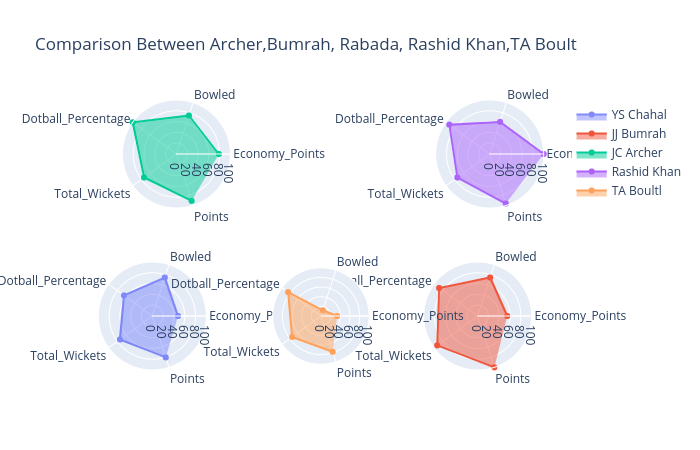

In [240]:
data = [go.Scatterpolar(
  r = [x1['Economy_Points'].values[0],x1['Bowled'].values[0],x1['Dotball_Percentage'].values[0],x1['Total_Wickets'].values[0],x1['Points'].values[0]],
  theta = ['Economy_Points','Bowled','Dotball_Percentage','Total_Wickets','Points'],
  fill = 'toself', opacity = 0.8,
  name = "YS Chahal"),
        
    go.Scatterpolar(
  r = [y1['Economy_Points'].values[0],y1['Bowled'].values[0],y1['Dotball_Percentage'].values[0],y1['Total_Wickets'].values[0],y1['Points'].values[0]],
  theta = ['Economy_Points','Bowled','Dotball_Percentage','Total_Wickets','Points'],
  fill = 'toself',subplot = "polar2",
    name = "JJ Bumrah"),
       
    go.Scatterpolar(
  r = [z1['Economy_Points'].values[0],z1['Bowled'].values[0],z1['Dotball_Percentage'].values[0],z1['Total_Wickets'].values[0],z1['Points'].values[0]],
  theta = ['Economy_Points','Bowled','Dotball_Percentage','Total_Wickets','Points'],
  fill = 'toself',subplot = "polar3",
    name = "JC Archer"),
       
       go.Scatterpolar(
       r=[a1['Economy_Points'].values[0],a1['Bowled'].values[0],a1['Dotball_Percentage'].values[0],a1['Total_Wickets'].values[0],a1['Points'].values[0]],
  theta = ['Economy_Points','Bowled','Dotball_Percentage','Total_Wickets','Points'],
  fill = 'toself', subplot = "polar4",
  name = "Rashid Khan"),
        go.Scatterpolar(
        r=[b1['Economy_Points'].values[0],b1['Bowled'].values[0],b1['Dotball_Percentage'].values[0],b1['Total_Wickets'].values[0],b1['Points'].values[0]],
  theta = ['Economy_Points','Bowled','Dotball_Percentage','Total_Wickets','Points'],
  fill = 'toself', subplot = "polar5",
  name = "TA Boultl")]

layout = go.Layout(title = "Comparison Between Archer,Bumrah, Rabada, Rashid Khan,TA Boult",
                   
                   polar = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.30],y = [0, 0.40])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.65, 1],y = [0, 0.40])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.40],y = [0.60, 1])),
                  
                  polar4 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.70, 1],y = [0.60, 1])),
                  
                  polar5 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [.40, .60],y = [0, 0.40])),)

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image(filename='/home/elkanio/IPL_DataSet/Images/ball_comp.png', width=900) 


### Points Distribution of Top Bowlers
 

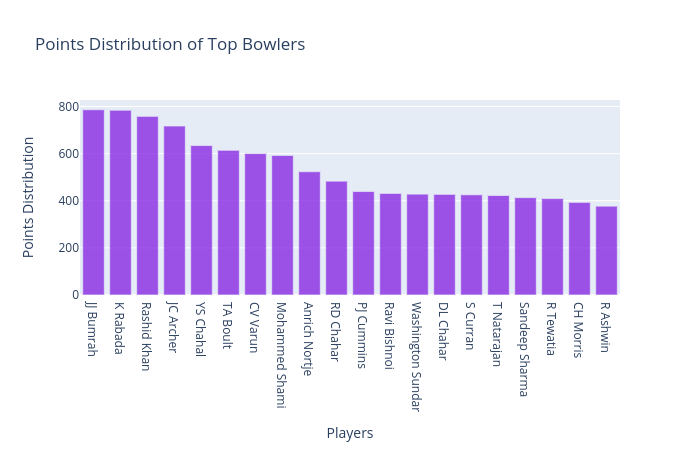

In [241]:
bowler_wkt_visual=bowler_wkt.sort_values('Total_Points',ascending=False).head(20)
trace1 = go.Bar(
    x=bowler_wkt_visual['Player'],
    y=bowler_wkt_visual['Total_Points'],
    name='Batting points',opacity=0.8,
    marker=dict(color='blueviolet'))


data = [trace1]
layout = go.Layout(title="Points Distribution of Top Bowlers",barmode='stack',xaxis = dict(tickmode='linear',title= "Players"),
                                    yaxis = dict(title= "Points Distribution"))

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image(filename='/home/elkanio/IPL_DataSet/Images/point_ball.png', width=900) 


# Fielding

In [183]:
df_field = pd.read_csv("/home/elkanio/archive (6)/Deliveries IPL 2020.csv")
df_field.head(5)

,Match_ID,inning,batting_team,bowling_team,Over,Ball,batsman,non_striker,Bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,Batsman_Runs,Extras,Total_Runs,player_dismissed,Dismissal_Kind,fielder
0,1216492.0,1.0,MI,CSK,1.0,1.0,RG Sharma,Q de Kock,DL Chahar,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
1,1216492.0,1.0,MI,CSK,1.0,2.0,RG Sharma,Q de Kock,DL Chahar,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
2,1216492.0,1.0,MI,CSK,1.0,3.0,Q de Kock,RG Sharma,DL Chahar,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
3,1216492.0,1.0,MI,CSK,1.0,4.0,Q de Kock,RG Sharma,DL Chahar,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
4,1216492.0,1.0,MI,CSK,1.0,5.0,Q de Kock,RG Sharma,DL Chahar,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


### Analysing Top Field Wickets 

In [184]:
fielder_caught = (df_field['Dismissal_Kind']=='caught')
fielder_caught_and_bowled = (df_field['Dismissal_Kind']=='caught and bowled')
fielder_runout = (df_field['Dismissal_Kind']=='run out')
fielder_stumped = (df_field['Dismissal_Kind']=='stumped')


In [185]:
fielder_caught = df_field.loc[fielder_caught].groupby('fielder').Dismissal_Kind.count()
fielder_caught_and_bowled = df_field.loc[fielder_caught_and_bowled].groupby('fielder').Dismissal_Kind.count()
fielder_runout = df_field.loc[fielder_runout].groupby('fielder').Dismissal_Kind.count()
fielder_stumped = df_field.loc[fielder_stumped].groupby('fielder').Dismissal_Kind.count()


In [186]:
fielder_caught = fielder_caught.to_frame().reset_index().rename(columns={'Dismissal_Kind':'Caught'})
fielder_caught_and_bowled = fielder_caught_and_bowled.to_frame().reset_index().rename(columns={'Dismissal_Kind':'Caught&Bowled'})
fielder_runout = fielder_runout.to_frame().reset_index().rename(columns={'Dismissal_Kind':'Runout'})
fielder_stumped = fielder_stumped.to_frame().reset_index().rename(columns={'Dismissal_Kind':'Stumped'})

### Merging and Assigning Points to Fielders

In [188]:
fielder_stat = pd.merge(pd.merge(pd.merge(fielder_caught,fielder_caught_and_bowled,on='fielder',how='outer'),fielder_runout,on='fielder',how='outer'),fielder_stumped,on='fielder',how='outer')
fielder_stat= fielder_stat.fillna(0)
fielder_stat['Field_Point'] = fielder_stat['Caught'] * 8 + fielder_stat['Caught&Bowled'] * 8 + fielder_stat['Runout'] * 8 + fielder_stat['Stumped'] * 8 
fielder_stat=fielder_stat.rename(columns={'fielder':'Player'})
fielder_stat.sort_values(by='Field_Point',ascending=False)


,Player,Caught,Caught&Bowled,Runout,Stumped,Field_Point
77,Q de Kock,15.0,0.0,0.0,3.0,144.0
60,MS Dhoni,16.0,0.0,0.0,1.0,136.0
50,KL Rahul,12.0,0.0,2.0,0.0,112.0
87,RR Pant,12.0,0.0,1.0,0.0,104.0
23,DA Warner,12.0,0.0,1.0,0.0,104.0
...,...,...,...,...,...,...
39,JD Unadkat,1.0,0.0,0.0,0.0,8.0
35,Ishan Kishan,1.0,0.0,0.0,0.0,8.0
79,R Parag,1.0,0.0,0.0,0.0,8.0
102,SPGoswami,1.0,0.0,0.0,0.0,8.0


### Analysing Top 5 Fielders

In [189]:
field_chrt = fielder_stat[['Player','Caught','Runout','Stumped','Field_Point']]
field_chrt['Caught'] =(field_chrt['Caught'])/(field_chrt['Caught'].max()/100)
field_chrt['Runout'] =(field_chrt['Runout'])/(field_chrt['Runout'].max()/100)

field_chrt['Stumped'] =(field_chrt['Stumped'])/(field_chrt['Stumped'].max()/100)
field_chrt['Field_Point'] =(field_chrt['Field_Point'])/(field_chrt['Field_Point'].max()/100)

In [190]:
x2 =  field_chrt[field_chrt['Player']=='MS Dhoni']
y2 =  field_chrt[field_chrt['Player']=='Q de Kock']
z2 =  field_chrt[field_chrt['Player']=='RR Pant']
a2 =  field_chrt[field_chrt['Player']=='KL Rahul']
b2 =  field_chrt[field_chrt['Player']=='DA Warner']

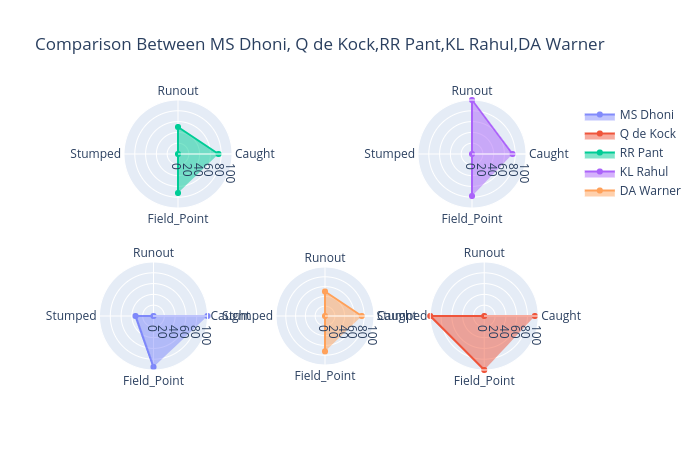

In [242]:
data = [go.Scatterpolar(
  r = [x2['Caught'].values[0],x2['Runout'].values[0],x2['Stumped'].values[0],x2['Field_Point'].values[0]],
  theta = ['Caught','Runout','Stumped','Field_Point'],
  fill = 'toself', opacity = 0.8,
  name = "MS Dhoni"),
        
    go.Scatterpolar(
  r = [y2['Caught'].values[0],y2['Runout'].values[0],y2['Stumped'].values[0],y2['Field_Point'].values[0]],
    theta = ['Caught','Runout','Stumped','Field_Point'],
  fill = 'toself',subplot = "polar2",
    name = "Q de Kock"),
       
    go.Scatterpolar(
  r = [z2['Caught'].values[0],z2['Runout'].values[0],z2['Stumped'].values[0],z2['Field_Point'].values[0]],
    theta = ['Caught','Runout','Stumped','Field_Point'],
  fill = 'toself',subplot = "polar3",
    name = "RR Pant"),
       
       go.Scatterpolar(
       r=[a2['Caught'].values[0],a2['Runout'].values[0],a2['Stumped'].values[0],a2['Field_Point'].values[0]],
    theta = ['Caught','Runout','Stumped','Field_Point'],
  fill = 'toself', subplot = "polar4",
  name = "KL Rahul"),
        go.Scatterpolar(
        r=[b2['Caught'].values[0],b2['Runout'].values[0],b2['Stumped'].values[0],b2['Field_Point'].values[0]],
  theta = ['Caught','Runout','Stumped','Field_Point'],
  fill = 'toself', subplot = "polar5",
  name = "DA Warner")]

layout = go.Layout(title = "Comparison Between MS Dhoni, Q de Kock,RR Pant,KL Rahul,DA Warner",
                   
                   polar = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.30],y = [0, 0.40])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.65, 1],y = [0, 0.40])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.40],y = [0.60, 1])),
                  
                  polar4 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.60, 1],y = [0.60, 1])),
                  
                  polar5 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [.40, .60],y = [0, 0.40])),)

fig = go.Figure(data=data, layout=layout)
#iplot(fig)

Image(filename='/home/elkanio/IPL_DataSet/Images/field_comp.png', width=900) 


## Points Distribution of Top Fielders

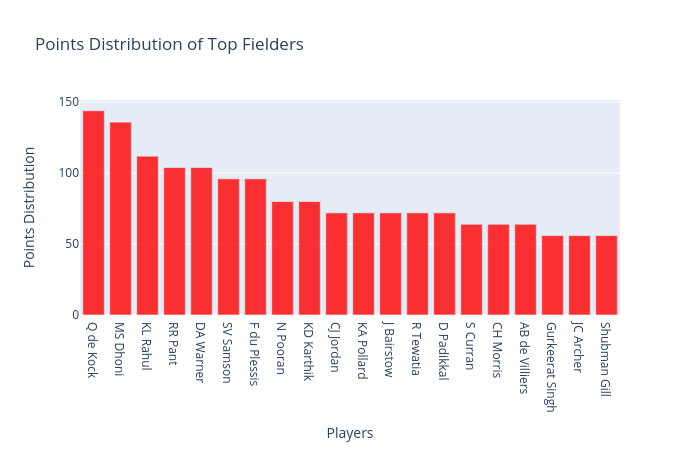

In [243]:
fielder_stat_visual=fielder_stat.sort_values('Field_Point',ascending=False).head(20)
trace1 = go.Bar(
    x=fielder_stat_visual['Player'],
    y=fielder_stat_visual['Field_Point'],
    name='Batting points',opacity=0.8,
    marker=dict(color='red'))


data = [trace1]
layout = go.Layout(title="Points Distribution of Top Fielders",xaxis = dict(tickmode='linear',title= "Players"),
                                    yaxis = dict(title= "Points Distribution"))

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image(filename='/home/elkanio/IPL_DataSet/Images/field_point.png', width=900) 


# IPL 2020 BEST 11

###### Comparing all the Bating , Bowling and Fielding points of all the players together , we are selecting the Best 11 of this season IPL acording to the position.

In [193]:
df_batsman = bating_stat[['Player','Points']]
df_bowler = bowler_wkt[['Player','Total_Points']]
fielder_stat = fielder_stat[['Player','Field_Point']]
df_player_stat = pd.merge(df_bowler,df_batsman,on = 'Player',how='right')
df_player_stats = pd.merge(df_player_stat,fielder_stat,on='Player',how='right')

In [194]:
df_player_stats = df_player_stats.fillna(0)
df_player_stats=df_player_stats.rename(columns={'Total_Points':'Bowler_Points','Points':'Batting_Points'})
df_player_stats['Total_Points'] = df_player_stats['Bowler_Points'] + df_player_stats['Batting_Points'] + df_player_stats['Field_Point']
df_player_stats=df_player_stats.sort_values('Total_Points',ascending=False).head(24)

In [195]:
df_player_stats

,Player,Bowler_Points,Batting_Points,Field_Point,Total_Points
68,KL Rahul,0.0,830.0,112.0,942.0
12,JC Archer,717.0,138.0,56.0,911.0
17,K Rabada,784.0,64.0,40.0,888.0
33,Rashid Khan,758.0,42.0,32.0,832.0
79,S Dhawan,0.0,775.0,40.0,815.0
15,JJ Bumrah,786.0,5.0,8.0,799.0
30,R Tewatia,409.0,302.0,72.0,783.0
46,DA Warner,20.0,628.0,104.0,752.0
51,Q de Kock,5.0,600.0,144.0,749.0
23,MK Pandey,125.0,496.0,56.0,677.0


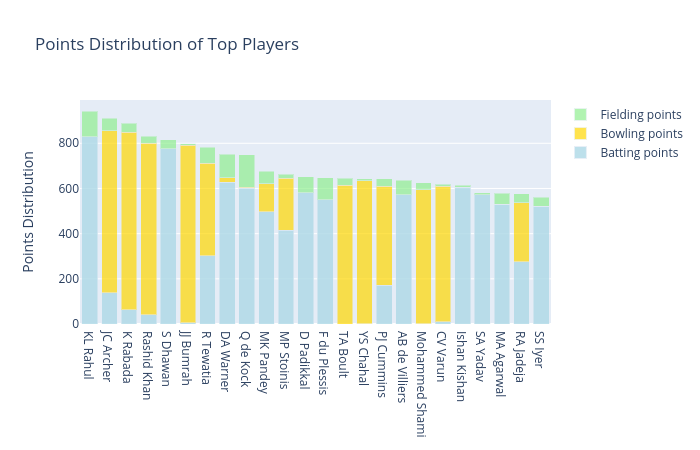

In [244]:
trace1 = go.Bar(
    x=df_player_stats['Player'],
    y=df_player_stats['Batting_Points'],
    name='Batting points',opacity=0.8,
    marker=dict(color='lightblue'))

trace2 = go.Bar(
    x=df_player_stats['Player'],
    y=df_player_stats['Bowler_Points'],
    name='Bowling points',opacity=0.7,
    marker=dict(color='gold'))

trace3 = go.Bar(
    x=df_player_stats['Player'],
    y=df_player_stats['Field_Point'],
    name='Fielding points',opacity=0.7,
    marker=dict(color='lightgreen'))


data = [trace1, trace2, trace3]
layout = go.Layout(title="Points Distribution of Top Players",barmode='stack',xaxis = dict(tickmode='linear'),
                                    yaxis = dict(title= "Points Distribution"))

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image(filename='/home/elkanio/IPL_DataSet/Images/point_all.png', width=900) 


### So, after applying analytics and domain knowledge the perfect IPL Team of the Year 2020 are :

#### 1. KL Rahul (c & wk)
#### 2. Shikhar Dhawan
#### 3. Suryakumar Yadav
#### 4. Ishan Kishan
#### 5. AB de Villiers (Overseas)
#### 6. Rahul Tewatia
#### 7. Rashid Khan  (Overseas)
#### 8. Jofra Archer  (Overseas)
#### 9. Trent Boult  (Overseas)
#### 10. Jasprit Bumrah
#### 11. Yuzvendra Chahal